In [108]:
import pandas as pd
data_frame = pd.read_excel("futbolargentino.xlsx")
data_frame

,Jugadores,Posicion,Edad,Altura,Pie,Fichado,Equipo Anterior,Valor de mercado,Temporada,Club
0,Nicolás Gianni,Centrocampista,25,1.75,derecho,01/07/2000,Inferiores Argentinos Juniors,800000,2008,Argentinos Juniors
1,Maximiliano Sola,Defensa,22,1.8,izquierdo,-,NaN,-,2008,Argentinos Juniors
2,Nicolás Navarro,Portero,23,1.9,derecho,24/07/2010,SSC Nápoles,2000000,2008,Argentinos Juniors
3,Juan Carrera,Portero,27,1.91,derecho,01/01/2005,inactivo,800000,2008,Argentinos Juniors
4,Sebastián Torrico,Portero,28,1.86,derecho,01/01/2009,CD Godoy Cruz Antonio Tomba,250000,2008,Argentinos Juniors
...,...,...,...,...,...,...,...,...,...,...
12087,Sebastián Sosa Sánchez,Delantero centro,29,1.87,derecho,20/01/2022,CA Boston River,1300000,2022,Velez Sarsfield
12088,Lucas Pratto,Delantero centro,21,1.86,derecho,27/08/2021,Libre,450000,2022,Velez Sarsfield
12089,Santiago Castro,Delantero centro,22,1.79,derecho,01/01/2022,CA Vélez Sarsfield Inferiores,100000,2022,Velez Sarsfield
12090,Mateo Pellegrino,Delantero centro,29,1.93,izquierdo,-,NaN,50000,2022,Velez Sarsfield


In [109]:
# NUEVA COLUMNA POSICION SIMPLIFICADA:


def get_position(row):
    pos = row["Posicion"]
    if str.startswith(pos, "Defensa") or str.startswith(pos, "Lateral"):
        return "Defensor"
    elif str.startswith(
        pos, ("Medio", "Centrocampista", "Pivote", "Interior", "Mediapunta")
    ):
        return "Mediocampista"
    elif str.startswith(pos, ("Delantero", "Extremo")):
        return "Delantero"
    elif pos == "Portero":
        return "Arquero"
    return ""


data_frame["Posicion simplificada"] = data_frame.apply(get_position, axis=1)

empty_rows = data_frame[data_frame["Posicion simplificada"] == ""]
data_frame

,Jugadores,Posicion,Edad,Altura,Pie,Fichado,Equipo Anterior,Valor de mercado,Temporada,Club,Posicion simplificada
0,Nicolás Gianni,Centrocampista,25,1.75,derecho,01/07/2000,Inferiores Argentinos Juniors,800000,2008,Argentinos Juniors,Mediocampista
1,Maximiliano Sola,Defensa,22,1.8,izquierdo,-,NaN,-,2008,Argentinos Juniors,Defensor
2,Nicolás Navarro,Portero,23,1.9,derecho,24/07/2010,SSC Nápoles,2000000,2008,Argentinos Juniors,Arquero
3,Juan Carrera,Portero,27,1.91,derecho,01/01/2005,inactivo,800000,2008,Argentinos Juniors,Arquero
4,Sebastián Torrico,Portero,28,1.86,derecho,01/01/2009,CD Godoy Cruz Antonio Tomba,250000,2008,Argentinos Juniors,Arquero
...,...,...,...,...,...,...,...,...,...,...,...
12087,Sebastián Sosa Sánchez,Delantero centro,29,1.87,derecho,20/01/2022,CA Boston River,1300000,2022,Velez Sarsfield,Delantero
12088,Lucas Pratto,Delantero centro,21,1.86,derecho,27/08/2021,Libre,450000,2022,Velez Sarsfield,Delantero
12089,Santiago Castro,Delantero centro,22,1.79,derecho,01/01/2022,CA Vélez Sarsfield Inferiores,100000,2022,Velez Sarsfield,Delantero
12090,Mateo Pellegrino,Delantero centro,29,1.93,izquierdo,-,NaN,50000,2022,Velez Sarsfield,Delantero


In [110]:
data_frame.dtypes

Jugadores                object
Posicion                 object
Edad                     object
Altura                   object
Pie                      object
Fichado                  object
Equipo Anterior          object
Valor de mercado         object
Temporada                 int64
Club                     object
Posicion simplificada    object
dtype: object

In [111]:
# CORRECCIÓN DE TIPOS
# Numero
data_frame["Altura"] = pd.to_numeric(data_frame["Altura"], errors="coerce")
data_frame["Edad"] = pd.to_numeric(data_frame["Edad"], errors="coerce")
data_frame["Valor de mercado"] = pd.to_numeric(
    data_frame["Valor de mercado"], errors="coerce"
)
data_frame["Temporada"] = pd.to_numeric(data_frame["Temporada"], errors="coerce")

# Texto
data_frame["Jugadores"] = data_frame["Jugadores"].astype(str)
data_frame["Pie"] = data_frame["Pie"].astype(str)
data_frame["Equipo Anterior"] = data_frame["Equipo Anterior"].astype(str)
data_frame["Club"] = data_frame["Club"].astype(str)
data_frame["Posicion simplificada"] = data_frame["Posicion simplificada"].astype(str)

# Fecha
data_frame["Fichado"] = pd.to_datetime(
    data_frame["Fichado"], errors="coerce", format="%d/%m/%Y"
)

data_frame.dtypes

Jugadores                        object
Posicion                         object
Edad                            float64
Altura                          float64
Pie                              object
Fichado                  datetime64[ns]
Equipo Anterior                  object
Valor de mercado                float64
Temporada                         int64
Club                             object
Posicion simplificada            object
dtype: object

In [112]:
# IMPUTAR FALTANTES
median_vm = data_frame["Valor de mercado"].median()
data_frame["Valor de mercado"] = data_frame["Valor de mercado"].fillna(median_vm)

mean_age = data_frame["Edad"].mean().__round__(0)
data_frame["Edad"] = pd.to_numeric(data_frame["Edad"].fillna(mean_age))

mean_height = data_frame["Altura"].mean().__round__(2)
data_frame["Altura"] = data_frame["Altura"].fillna(mean_height)

data_frame

,Jugadores,Posicion,Edad,Altura,Pie,Fichado,Equipo Anterior,Valor de mercado,Temporada,Club,Posicion simplificada
0,Nicolás Gianni,Centrocampista,25.0,1.75,derecho,2000-07-01,Inferiores Argentinos Juniors,800000.0,2008,Argentinos Juniors,Mediocampista
1,Maximiliano Sola,Defensa,22.0,1.80,izquierdo,NaT,nan,600000.0,2008,Argentinos Juniors,Defensor
2,Nicolás Navarro,Portero,23.0,1.90,derecho,2010-07-24,SSC Nápoles,2000000.0,2008,Argentinos Juniors,Arquero
3,Juan Carrera,Portero,27.0,1.91,derecho,2005-01-01,inactivo,800000.0,2008,Argentinos Juniors,Arquero
4,Sebastián Torrico,Portero,28.0,1.86,derecho,2009-01-01,CD Godoy Cruz Antonio Tomba,250000.0,2008,Argentinos Juniors,Arquero
...,...,...,...,...,...,...,...,...,...,...,...
12087,Sebastián Sosa Sánchez,Delantero centro,29.0,1.87,derecho,2022-01-20,CA Boston River,1300000.0,2022,Velez Sarsfield,Delantero
12088,Lucas Pratto,Delantero centro,21.0,1.86,derecho,2021-08-27,Libre,450000.0,2022,Velez Sarsfield,Delantero
12089,Santiago Castro,Delantero centro,22.0,1.79,derecho,2022-01-01,CA Vélez Sarsfield Inferiores,100000.0,2022,Velez Sarsfield,Delantero
12090,Mateo Pellegrino,Delantero centro,29.0,1.93,izquierdo,NaT,nan,50000.0,2022,Velez Sarsfield,Delantero


In [113]:
from unidecode import unidecode

club_list = data_frame["Club"].unique().tolist()


def normalize(text):
    return unidecode(str.lower(text))


def get_club(equipo_anterior):
    for club in club_list:
        if normalize(club) in normalize(equipo_anterior):
            return club
    return equipo_anterior


equipo_anterior_normalized = data_frame["Equipo Anterior"].apply(get_club)

data_frame["Equipo Anterior Normalizado"] = equipo_anterior_normalized

with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(equipo_anterior_normalized.drop_duplicates())

0                                 Argentinos Juniors
1                                                nan
2                                        SSC Nápoles
3                                           inactivo
4                           Godoy Cruz Antonio Tomba
6                                              Libre
7                                    Rosario Central
11                               Club Atlético Unión
13                             Quilmes Atlético Club
14                   Sport Club Corinthians Paulista
15                                              Boca
22                                       CA Platense
23                                        FC Lorient
27                                     Nueva Chicago
28                                       Club Olimpo
30                            CA San Martín San Juan
31                             Club Sportivo Ben Hur
35                           Club Atlético San Telmo
36                                     Libre35

In [114]:
data_frame

,Jugadores,Posicion,Edad,Altura,Pie,Fichado,Equipo Anterior,Valor de mercado,Temporada,Club,Posicion simplificada,Equipo Anterior Normalizado
0,Nicolás Gianni,Centrocampista,25.0,1.75,derecho,2000-07-01,Inferiores Argentinos Juniors,800000.0,2008,Argentinos Juniors,Mediocampista,Argentinos Juniors
1,Maximiliano Sola,Defensa,22.0,1.80,izquierdo,NaT,nan,600000.0,2008,Argentinos Juniors,Defensor,nan
2,Nicolás Navarro,Portero,23.0,1.90,derecho,2010-07-24,SSC Nápoles,2000000.0,2008,Argentinos Juniors,Arquero,SSC Nápoles
3,Juan Carrera,Portero,27.0,1.91,derecho,2005-01-01,inactivo,800000.0,2008,Argentinos Juniors,Arquero,inactivo
4,Sebastián Torrico,Portero,28.0,1.86,derecho,2009-01-01,CD Godoy Cruz Antonio Tomba,250000.0,2008,Argentinos Juniors,Arquero,Godoy Cruz Antonio Tomba
...,...,...,...,...,...,...,...,...,...,...,...,...
12087,Sebastián Sosa Sánchez,Delantero centro,29.0,1.87,derecho,2022-01-20,CA Boston River,1300000.0,2022,Velez Sarsfield,Delantero,CA Boston River
12088,Lucas Pratto,Delantero centro,21.0,1.86,derecho,2021-08-27,Libre,450000.0,2022,Velez Sarsfield,Delantero,Libre
12089,Santiago Castro,Delantero centro,22.0,1.79,derecho,2022-01-01,CA Vélez Sarsfield Inferiores,100000.0,2022,Velez Sarsfield,Delantero,Velez Sarsfield
12090,Mateo Pellegrino,Delantero centro,29.0,1.93,izquierdo,NaT,nan,50000.0,2022,Velez Sarsfield,Delantero,nan


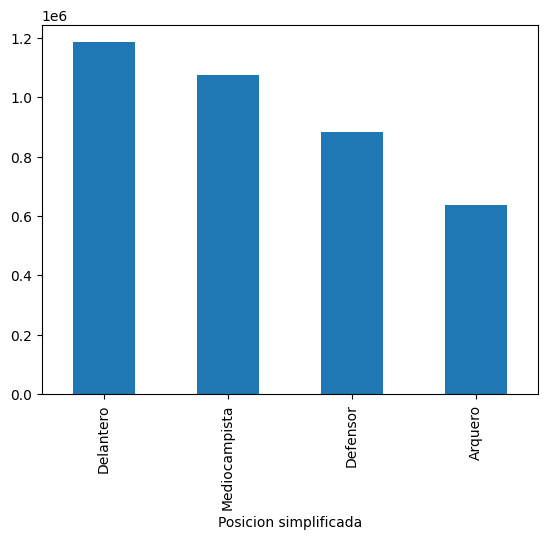

In [115]:
grouped_by_pos = data_frame.groupby(by='Posicion simplificada')
plot = grouped_by_pos['Valor de mercado'].mean().sort_values(ascending=False).plot(kind='bar')

C:\Users\Lucas\AppData\Local\Temp\ipykernel_11228\2193628475.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_height = data_frame.groupby('Intervalo')['Intervalo'].count()


1.56 1.99 0.043 1.7906028779358254


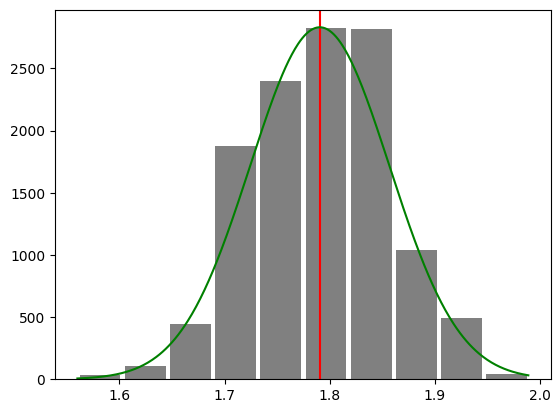

In [165]:

import matplotlib.pyplot as plt
from scipy.stats import norm,tstd
import numpy as np


min = data_frame['Altura'].min()
max = data_frame['Altura'].max()
intervals_count = 10
interval = (max - min)/intervals_count
mid_point = []
bins = []
for i in range(intervals_count+1):
    val = min + i*interval
    bins.append(val)
    if (val != min):
# LOS INTERVALOS SE VUELVEN ETIQUTAS Y SU UBICACIÒN EN EL GRÁFICO NO REPRESENTA AL PUNTO MEDIO DEL INTERVALO
        mid_point.append(val-interval/2)

data_frame['Intervalo'] = pd.cut(data_frame['Altura'], bins=bins)
grouped_height = data_frame.groupby('Intervalo')['Intervalo'].count()
plt.bar(mid_point, grouped_height.tolist(), width=interval*.9,color='gray')

#Media
mean = data_frame['Altura'].mean()
plt.axvline(x=mean, color='red')

#Normal
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(min, max, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm(mean,tstd(data_frame['Altura'])).pdf(x_axis)*470, color='green')

print(min, max, interval, mean)